In [1]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

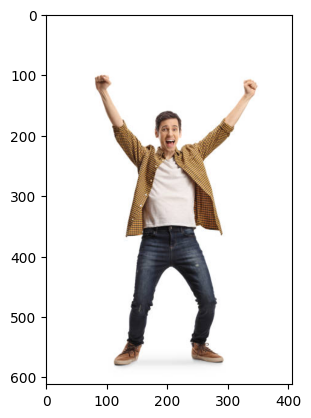

Age: 32


In [15]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Correcting the file path
file_path = r"D:\IntegrationXpert\male & female classification (2)\dataset\non-video\images\image_46.jpg"

# Read the image
img1 = cv2.imread(file_path)

# Check if the image is read correctly
if img1 is None:
    print(f"Failed to load image. Check the file path: {file_path}")
else:
    # Display the image
    plt.imshow(img1[:, :, ::-1])
    plt.show()

    # Analyze the image for age
    result = DeepFace.analyze(img1, actions=['age'])
    
    # Print the age only
    age = result[0]['age'] if isinstance(result, list) else result['age']
    print("Age:", age)


1/1 [==============================] - 0s 17ms/step


 18%|█▊        | 97.0M/539M [19:10<1:27:18, 84.3kB/s]


1/1 [==============================] - 0s 94ms/step


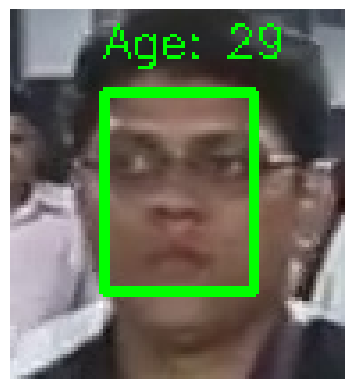

In [36]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
from mtcnn import MTCNN

# Correcting the file path
file_path = r"D:\IntegrationXpert\male & female classification (2)\unique faces\female\video3_649_369.jpg"

# Read the image
img1 = cv2.imread(file_path)

# Load the MTCNN face detector
detector = MTCNN()

# Detect faces in the image
faces = detector.detect_faces(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

# Iterate over each detected face
for face in faces:
    x, y, w, h = face['box']
    
    # Reduce the size of the bounding box
    padding = int(0.1 * h)  # 10% padding
    x += padding
    y += padding
    w -= 2 * padding
    h -= 2 * padding
    
    # Extract the face region
    face_region = img1[y:y+h, x:x+w]
    
    # Check if the face region is valid
    if face_region.size == 0:
        continue
    
    try:
        # Analyze the face region for age
        predictions = DeepFace.analyze(face_region, actions=['age'], enforce_detection=False)
        
        # Extract the age
        if isinstance(predictions, list) and len(predictions) > 0:
            age = predictions[0]['age']
        else:
            age = predictions['age']
        
        # Calculate font scale based on the face region size
        font_scale = w / 100
        font_thickness = 1  # Set font thickness to a lighter value
        
        # Draw rectangles around faces and add the age text
        cv2.rectangle(img1, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img1, f'Age: {age}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), font_thickness)
    
    except ValueError as e:
        print(f"Error processing face region at [{x}, {y}, {w}, {h}]: {e}")

# Display the image with bounding boxes and age text
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()


In [1]:
from deepface import DeepFace
import cv2
from mtcnn import MTCNN
import os

# Path to the input video
video_path = r"C:\Users\User\Downloads\videos\video6.mp4"

# Path to save the processed video
save_dir = r"D:\IntegrationXpert\age detection\testing"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, 'processed_video_1.mp4')

# Load the video
cap = cv2.VideoCapture(video_path)

# Get the video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Create a VideoWriter object
out = cv2.VideoWriter(save_path, fourcc, fps, (frame_width, frame_height))

# Load the MTCNN face detector
detector = MTCNN()

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    # Detect faces in the frame
    faces = detector.detect_faces(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Draw rectangles around faces and add the age text
    for face in faces:
        x, y, w, h = face['box']
        face_region = frame[y:y+h, x:x+w]

        # Check if the face region is valid
        if face_region.size == 0:
            continue

        try:
            # Analyze the face region for age
            predictions = DeepFace.analyze(face_region, actions=['age'], enforce_detection=False)
            
            # Extract the age
            if isinstance(predictions, list) and len(predictions) > 0:
                age = predictions[0]['age']
            else:
                age = predictions['age']
            
            # Draw rectangles around faces and add the age text
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, f'Age: {age}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        
        except ValueError as e:
            print(f"Error processing face region at [{x, y, w, h}]: {e}")

    # Write the frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

print(f"Processed video saved to {save_path}")



3/3 [==============================] - 0s 9ms/step
Processed video saved to D:\IntegrationXpert\age detection\testing\processed_video_1.mp4
